# (1) Load Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# (2) Load & Check Data

In [2]:
data_path = r'C:/Users/user/Desktop/딥러닝프레임워크_박성호/spam.csv'
data = pd.read_csv(data_path,encoding='latin1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.head(5) #head() 처음 다섯줄의 데이터 출력

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.loc[:,['v1','v2']] #loc() 행 또는 열의 데이터 조회, 모든 행은 :로 표시하고 쉼표(,)를 입력하고 열명을 입력하면 해당 열만 가져옵니다.

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
data.iloc[:,:2]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# (3) Data 전처리

In [7]:
data=data[['v1','v2']]

In [8]:
data['v1'].replace(['ham','spam'],[0,1],inplace=True) #ham을 0으로 spam을 1로

In [9]:
data['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [10]:
data.columns

Index(['v1', 'v2'], dtype='object')

In [11]:
data.columns=['Y','des']

In [12]:
data.head(5)

,Y,des
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# missing value 확인 

In [13]:
data.isnull()

,Y,des
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [14]:
data.isnull().any() #한개라도 있으면 True, 없으면 False

Y      False
des    False
dtype: bool

In [15]:
data.isnull().values.any() #변수를 다 포함해서 null이 있냐없냐 판단

False

# 중복확인 및 제거

In [16]:
data.shape #(행,열)

(5572, 2)

In [17]:
print(data.nunique()) #유니크한 값이 몇개있는지 보여주는것(ex.0이나 1) #5572개중에 5169개가 unique하닌까 중복된 것이 있는것

Y         2
des    5169
dtype: int64


In [18]:
print(data.shape)

(5572, 2)


In [19]:
data.drop_duplicates(subset=['des'],inplace=True, keep='first') #ex.3개가 중복되었을 때 첫 번째것만 남기고 나머지 제거(keep='first') #last or False

In [20]:
data.shape

(5169, 2)

# Y 변수 범주 비율확인

In [21]:
print(np.unique(data['Y'],return_counts=True)) #주어진NumPy 배열의 모든 고유 값을 검색하고 이러한 고유 값을 정렬 #Y=0인게 4516개, Y=1인게 653개

(array([0, 1], dtype=int64), array([4516,  653], dtype=int64))


<AxesSubplot:xlabel='Y', ylabel='count'>

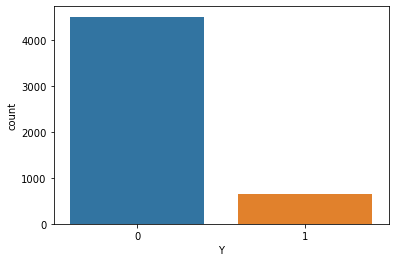

In [22]:
sns.countplot(x='Y',data=data)

# X and Y split

In [23]:
X=data['des']
Y=data['Y']

# (4) Text 전처리

In [24]:
import nltk #영어 전처리를 위한

In [25]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer

In [26]:
from nltk.tag import pos_tag

In [27]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [29]:
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

In [30]:
stop_words=set(stopwords.words('english'))

In [31]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [32]:
tokenizer=TreebankWordTokenizer()
Lemmatizer=WordNetLemmatizer()
stemmer=PorterStemmer()

In [33]:
emails=X

In [34]:
email=emails[0] #첫 번째 이메일
tokens=tokenizer.tokenize(email)
pos_tag(tokens)

[('Go', 'NNP'),
 ('until', 'IN'),
 ('jurong', 'JJ'),
 ('point', 'NN'),
 (',', ','),
 ('crazy..', 'NN'),
 ('Available', 'NNP'),
 ('only', 'RB'),
 ('in', 'IN'),
 ('bugis', 'NN'),
 ('n', 'RB'),
 ('great', 'JJ'),
 ('world', 'NN'),
 ('la', 'NN'),
 ('e', 'FW'),
 ('buffet', 'NN'),
 ('...', ':'),
 ('Cine', 'NNP'),
 ('there', 'EX'),
 ('got', 'VBD'),
 ('amore', 'RB'),
 ('wat', 'NN'),
 ('...', ':')]

In [35]:
i=1
new_emails=[]
final_tokens=[]

for email in emails:
    #(1) Tokenize
    tokens=tokenizer.tokenize(email)
    
    #(1-1) lower
    tokens=[word.lower() for word in tokens]
    
    #(2) Pos tagging
    pos_results=pos_tag(tokens)
    
    #(3) Noun Extract
    #lemma_noun=list()
    #stem_noun=list()
    
    temp_tokens=[]
    for word, tag in pos_results:
        
        #(4) lemma tizing
        lemma=Lemmatizer.lemmatize(word)
        
        #(5) stop word
        if lemma not in stop_words:
            final_tokens.append(lemma)
            temp_tokens.append(lemma)
    new_emails.append(temp_tokens)
    if i%100==0:
        print(i)
        
    i+=1

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100


In [36]:
emails[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [37]:
new_emails[0]

['go',
 'jurong',
 'point',
 ',',
 'crazy..',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'got',
 'amore',
 'wat',
 '...']

In [38]:
len(emails)

5169


# (5) 1차 Preprocessed Text 탐색

In [39]:
len(final_tokens)

60473

In [40]:
freqwords=nltk.FreqDist(final_tokens) # FreqDist 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스

In [41]:
freqwords

FreqDist({',': 1637, '?': 1482, '.': 1415, '!': 1242, '...': 1173, 'u': 1047, '&': 812, ';': 677, ':': 627, 'call': 497, ...})

In [42]:
len(freqwords)

10151

In [43]:
print("Number of words: {}".format(len(freqwords)))

Number of words: 10151


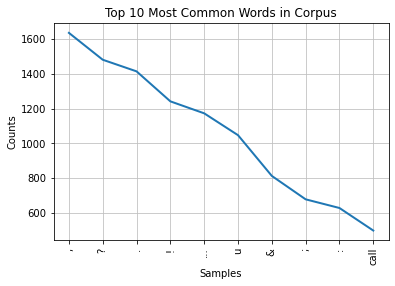

<AxesSubplot:title={'center':'Top 10 Most Common Words in Corpus'}, xlabel='Samples', ylabel='Counts'>

In [44]:
freqwords.plot(10, title="Top 10 Most Common Words in Corpus")

In [45]:
freqwords.most_common(30)

[(',', 1637),
 ('?', 1482),
 ('.', 1415),
 ('!', 1242),
 ('...', 1173),
 ('u', 1047),
 ('&', 812),
 (';', 677),
 (':', 627),
 ('call', 497),
 ("'s", 469),
 (')', 444),
 ('2', 439),
 ("'m", 379),
 ('get', 372),
 ("n't", 346),
 ('ur', 316),
 ('go', 291),
 ('gt', 288),
 ('lt', 287),
 ('#', 263),
 ('know', 244),
 ('got', 242),
 ('like', 234),
 ('free', 231),
 ('4', 231),
 ('come', 228),
 ('wa', 223),
 ("''", 215),
 ('ok', 214)]

In [46]:
new_stop_words=set()

for stop_token, _ in freqwords.most_common(30):
    new_stop_words.add(stop_token)

In [47]:
print(new_stop_words)

{',', "'m", 'u', '&', "'s", 'lt', 'free', '!', '.', 'know', '4', '...', '#', '?', ';', 'wa', 'ur', 'gt', ':', "''", 'call', 'go', "n't", 'like', '2', ')', 'ok', 'get', 'come', 'got'}


In [48]:
new_stop_words.remove('call')

In [49]:
new_stop_words.remove('free')

In [50]:
new_stop_words

{'!',
 '#',
 '&',
 "''",
 "'m",
 "'s",
 ')',
 ',',
 '.',
 '...',
 '2',
 '4',
 ':',
 ';',
 '?',
 'come',
 'get',
 'go',
 'got',
 'gt',
 'know',
 'like',
 'lt',
 "n't",
 'ok',
 'u',
 'ur',
 'wa'}

In [51]:
new_emails2=[]
new_emails_temp=[]
for email in new_emails:
    new_email=list(set(email)-new_stop_words) #차집합
    new_emails2.append(new_email)
    new_emails_temp.append(" ".join(new_email))

In [52]:
new_emails_temp

['crazy.. la available jurong n great amore wat point bugis cine e world buffet',
 'wif oni lar joking',
 'comp may 87121 cup free ( apply 2005. c entry std fa tkts txt 08452810075over18 text receive win 21st wkly final rate question',
 'early c already dun hor say',
 'though around nah life usf think',
 "week still 'd å£1.50 hey tb freemsg back fun std xxx chgs word rcv darling send 3",
 'aid treat me. brother patent even speak',
 "set callers. oru ( ' callertune ha press friend minnaminunginte nurungu vettam request copy 'melle *9 per melle",
 'å£900 selected receivea customer prize code reward winner valid 09061701461. 12 claim hour kl341. call network valued',
 'mobile update camera co 11 call latest 08002986030 entitled colour month free r',
 "talk home today cried stuff soon gon want 've k tonight anymore na enough",
 '6days 20,000 150p/day 100 chance info send > apply six pound cost txt cash 87575. win 16+ hl csh11 reply tsandcs',
 'prize 1 pobox 81010 membership c 4403ldnw1a7rw

In [53]:
new_emails2

[['crazy..',
  'la',
  'available',
  'jurong',
  'n',
  'great',
  'amore',
  'wat',
  'point',
  'bugis',
  'cine',
  'e',
  'world',
  'buffet'],
 ['wif', 'oni', 'lar', 'joking'],
 ['comp',
  'may',
  '87121',
  'cup',
  'free',
  '(',
  'apply',
  '2005.',
  'c',
  'entry',
  'std',
  'fa',
  'tkts',
  'txt',
  '08452810075over18',
  'text',
  'receive',
  'win',
  '21st',
  'wkly',
  'final',
  'rate',
  'question'],
 ['early', 'c', 'already', 'dun', 'hor', 'say'],
 ['though', 'around', 'nah', 'life', 'usf', 'think'],
 ['week',
  'still',
  "'d",
  'å£1.50',
  'hey',
  'tb',
  'freemsg',
  'back',
  'fun',
  'std',
  'xxx',
  'chgs',
  'word',
  'rcv',
  'darling',
  'send',
  '3'],
 ['aid', 'treat', 'me.', 'brother', 'patent', 'even', 'speak'],
 ['set',
  'callers.',
  'oru',
  '(',
  "'",
  'callertune',
  'ha',
  'press',
  'friend',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'request',
  'copy',
  "'melle",
  '*9',
  'per',
  'melle'],
 ['å£900',
  'selected',
  'receivea

# Word Cloud 

In [54]:
temp=pd.DataFrame(new_emails_temp)

In [55]:
temp

,0
0,crazy.. la available jurong n great amore wat ...
1,wif oni lar joking
2,comp may 87121 cup free ( apply 2005. c entry ...
3,early c already dun hor say
4,though around nah life usf think
...,...
5164,å£750 pound 2nd bt-national-rate tried easy pr...
5165,home b ì_ going fr esplanade
5166,* that. suggestion pity mood
5167,bitching else 'd buying acted interested gave ...


In [56]:
temp.index

RangeIndex(start=0, stop=5169, step=1)

In [57]:
temp['spam']=Y.values

In [58]:
type(Y)

pandas.core.series.Series

In [59]:
temp

,0,spam
0,crazy.. la available jurong n great amore wat ...,0
1,wif oni lar joking,0
2,comp may 87121 cup free ( apply 2005. c entry ...,1
3,early c already dun hor say,0
4,though around nah life usf think,0
...,...,...
5164,å£750 pound 2nd bt-national-rate tried easy pr...,1
5165,home b ì_ going fr esplanade,0
5166,* that. suggestion pity mood,0
5167,bitching else 'd buying acted interested gave ...,0


In [60]:
temp_spam=temp.loc[temp['spam']==1,0] #spam이 1인 행 가져오기

In [61]:
temp_spam

2       comp may 87121 cup free ( apply 2005. c entry ...
5       week still 'd å£1.50 hey tb freemsg back fun s...
8       å£900 selected receivea customer prize code re...
9       mobile update camera co 11 call latest 0800298...
11      6days 20,000 150p/day 100 chance info send > a...
                              ...                        
5137    gsex ring sec wc1n sex 3xx pobox cost 2667 exp...
5139    0870 dont å£800 servs free mega giv india å£25...
5146    etc. callback mobile nokia record contract min...
5163    pound pls postcode 2.50 great valid credit hou...
5164    å£750 pound 2nd bt-national-rate tried easy pr...
Name: 0, Length: 653, dtype: object

In [62]:
from wordcloud import WordCloud

In [63]:
spam_words=' '.join(temp_spam)

In [64]:
spam_words

"comp may 87121 cup free ( apply 2005. c entry std fa tkts txt 08452810075over18 text receive win 21st wkly final rate question week still 'd å£1.50 hey tb freemsg back fun std xxx chgs word rcv darling send 3 å£900 selected receivea customer prize code reward winner valid 09061701461. 12 claim hour kl341. call network valued mobile update camera co 11 call latest 08002986030 entitled colour month free r 6days 20,000 150p/day 100 chance info send > apply six pound cost txt cash 87575. win 16+ hl csh11 reply tsandcs prize 1 pobox 81010 membership c 4403ldnw1a7rw18 urgent txt claim www.dbuk.net word lccltd jackpot week å£100,000 free xxxmobilemovieclub http > n=qjkgighjjgcbl use //wap. txt credit xxxmobilemovieclub.com next link click message wap dont national england miss - v poboxox36504w45wq wale scotland 4txt/ì¼1.20 goals/team 87077 txt team eg try 16+ news. macedonia replying å£5/month no. mobile thanks uk subscription please yes confirm charged ringtone reply msg rodger free tried 

In [65]:
spam_wc=WordCloud(width=512,height=512)
wordcloud_results=spam_wc.generate(spam_words)

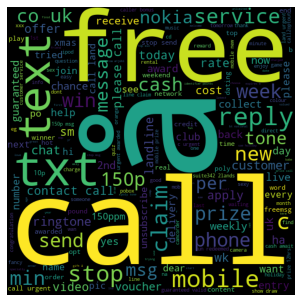

In [66]:
#image 보여줄 때
plt.imshow(wordcloud_results)
plt.axis('off') #축과 라벨을 끈다
plt.tight_layout(pad=0)

In [67]:
spam_wc=WordCloud(width=512, height=512, stopwords={'txt','a'})
wordcloud_results=spam_wc.generate(spam_words)

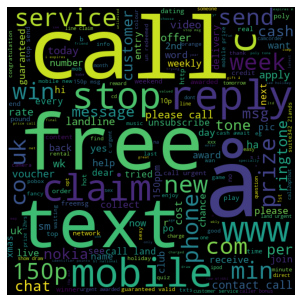

In [68]:
#image 보여줄 때
plt.imshow(wordcloud_results)
plt.axis('off')
plt.tight_layout(pad=0)

In [69]:
from wordcloud import STOPWORDS

In [70]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [71]:
word_cloud_stop_words=STOPWORDS.union({'txt', 'text','www'})

In [72]:
spam_wc=WordCloud(width=512, height=512, stopwords=word_cloud_stop_words)
wordcloud_results=spam_wc.generate(spam_words)

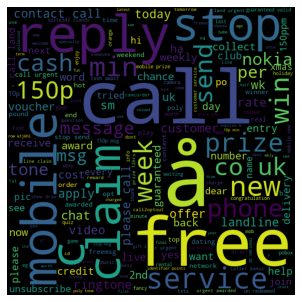

In [73]:
#image 보여줄 때
plt.imshow(wordcloud_results)
plt.axis('off')
plt.tight_layout(pad=0)

In [74]:
new_emails3=[]
new_str_emails3=[]

all_words=set()

for email in new_emails2:
    new_email=list(set(email)-word_cloud_stop_words)
    new_emails3.append(new_email)
    new_str_emails3.append(' '.join(new_email))
    
    all_words.update(new_email)

In [75]:
new_emails3

[['crazy..',
  'la',
  'available',
  'jurong',
  'n',
  'great',
  'amore',
  'wat',
  'point',
  'bugis',
  'cine',
  'e',
  'world',
  'buffet'],
 ['wif', 'oni', 'lar', 'joking'],
 ['comp',
  'may',
  '87121',
  'cup',
  'free',
  '(',
  'apply',
  '2005.',
  'c',
  'entry',
  'std',
  'fa',
  'tkts',
  '08452810075over18',
  'receive',
  'win',
  '21st',
  'wkly',
  'final',
  'rate',
  'question'],
 ['early', 'c', 'already', 'dun', 'hor', 'say'],
 ['though', 'around', 'nah', 'life', 'usf', 'think'],
 ['still',
  "'d",
  'week',
  'å£1.50',
  'hey',
  'tb',
  'freemsg',
  'back',
  'fun',
  'xxx',
  'chgs',
  'word',
  'rcv',
  'darling',
  'std',
  '3',
  'send'],
 ['aid', 'treat', 'me.', 'brother', 'patent', 'even', 'speak'],
 ['set',
  'callers.',
  'oru',
  '(',
  "'",
  'callertune',
  'ha',
  'friend',
  'minnaminunginte',
  '*9',
  'nurungu',
  'vettam',
  'request',
  'copy',
  "'melle",
  'melle',
  'per',
  'press'],
 ['selected',
  'receivea',
  'customer',
  'prize',
  

# (6) 전처리 Unstructed to Structured

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
TF=CountVectorizer() #각 텍스트에서 단어 출현 횟수를 카운팅한 벡터
TF_matrix=TF.fit_transform(new_str_emails3) #코퍼스로부터 각 단어의 빈도 수를 기록

In [81]:
len(new_str_emails3)

5169

In [80]:
TF_matrix

<5169x8243 sparse matrix of type '<class 'numpy.int64'>'
	with 41401 stored elements in Compressed Sparse Row format>

In [79]:
TF_matrix.toarray() #Sparse Matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
TF.vocabulary_ #각 단어의 인덱스가 어떻게 부여되었는지

{'crazy': 2248,
 'la': 4281,
 'available': 1279,
 'jurong': 4161,
 'great': 3483,
 'amore': 1054,
 'wat': 7862,
 'point': 5640,
 'bugis': 1705,
 'cine': 1986,
 'world': 8066,
 'buffet': 1703,
 'wif': 7976,
 'oni': 5275,
 'lar': 4315,
 'joking': 4131,
 'comp': 2098,
 'may': 4703,
 '87121': 781,
 'cup': 2305,
 'free': 3225,
 'apply': 1140,
 '2005': 401,
 'entry': 2838,
 'std': 6885,
 'fa': 2969,
 'tkts': 7362,
 '08452810075over18': 77,
 'receive': 6002,
 'win': 7989,
 '21st': 410,
 'wkly': 8027,
 'final': 3080,
 'rate': 5948,
 'question': 5897,
 'early': 2717,
 'already': 1027,
 'dun': 2698,
 'hor': 3754,
 'say': 6316,
 'though': 7303,
 'around': 1187,
 'nah': 4988,
 'life': 4395,
 'usf': 7678,
 'think': 7285,
 'still': 6907,
 'week': 7904,
 '50': 605,
 'hey': 3672,
 'tb': 7164,
 'freemsg': 3232,
 'back': 1326,
 'fun': 3282,
 'xxx': 8127,
 'chgs': 1941,
 'word': 8058,
 'rcv': 5961,
 'darling': 2360,
 'send': 6401,
 'aid': 979,
 'treat': 7477,
 'me': 4712,
 'brother': 1677,
 'patent': 544

In [83]:
TF.vocabulary_.keys()

dict_keys(['crazy', 'la', 'available', 'jurong', 'great', 'amore', 'wat', 'point', 'bugis', 'cine', 'world', 'buffet', 'wif', 'oni', 'lar', 'joking', 'comp', 'may', '87121', 'cup', 'free', 'apply', '2005', 'entry', 'std', 'fa', 'tkts', '08452810075over18', 'receive', 'win', '21st', 'wkly', 'final', 'rate', 'question', 'early', 'already', 'dun', 'hor', 'say', 'though', 'around', 'nah', 'life', 'usf', 'think', 'still', 'week', '50', 'hey', 'tb', 'freemsg', 'back', 'fun', 'xxx', 'chgs', 'word', 'rcv', 'darling', 'send', 'aid', 'treat', 'me', 'brother', 'patent', 'even', 'speak', 'set', 'callers', 'oru', 'callertune', 'ha', 'friend', 'minnaminunginte', 'nurungu', 'vettam', 'request', 'copy', 'melle', 'per', 'press', 'selected', 'receivea', 'customer', 'prize', 'code', 'reward', 'winner', 'valid', '09061701461', '12', 'claim', 'hour', 'kl341', 'call', 'network', '900', 'valued', 'mobile', 'update', 'camera', 'co', '11', 'latest', '08002986030', 'entitled', 'colour', 'month', 'talk', 'home',

In [86]:
columns=list(TF.vocabulary_.keys())
TF_matrix=pd.DataFrame(TF_matrix.toarray(),columns=columns)

In [87]:
TF_matrix.head()

,crazy,la,available,jurong,great,amore,wat,point,bugis,cine,...,unit,accent,lowes,heap,dump,salesman,087187272008,now1,pity,bitching
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
TF_matrix.shape

(5169, 8243)

In [90]:
means=TF_matrix.mean(axis=0) #단어 평균값

<AxesSubplot:>

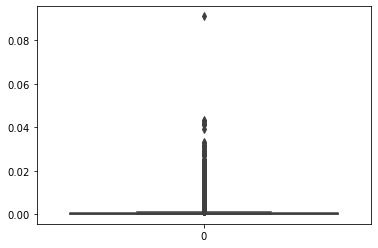

In [91]:
sns.boxplot(data=means)

In [93]:
means.idxmax() #최대값의 인덱스 번호

'ldn'

In [94]:
TF_matrix['Y']=Y.values

# (7) Supervised Learning 

# Train Test Split

In [95]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(TF_matrix.drop(['Y'],axis=1),TF_matrix['Y'],test_size=0.30, stratify=Y, random_state=2313, shuffle=True)
#입력값으로는 원본 데이터의 x,y
#test_size: 테스트 셋 구성의 비율
#shuffle: default=True 입니다. split을 해주기 이전에 섞을건지 여부
#stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값, stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

# Classifier Learning

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Set up each classifiers

In [122]:
RF=RandomForestClassifier(n_estimators=100,random_state=100) #n_estimator:트리 개수
GB=GradientBoostingClassifier(n_estimators=100, random_state=100)
LR=LogisticRegression(max_iter=200,random_state=100, solver='saga') #max_iter:반복 횟수 saga:경사 하강법을 변형한 하나의 최적화 방법

# Learn classifiers

In [143]:
RF.fit(train_x,train_y)
GB.fit(train_x,train_y)
LR.fit(train_x,train_y)

LogisticRegression(max_iter=1000, random_state=100, solver='saga')

In [136]:
LR=LogisticRegression(solver='saga',max_iter=1000, random_state=100)
LR.fit(train_x,train_y)

LogisticRegression(max_iter=1000, random_state=100, solver='saga')

# Validation

In [103]:
RF_test_pred=RF.predict(test_x)
GB_test_pred=GB.predict(test_x)
LR_test_pred=LR.predict(test_x)

In [107]:
from sklearn.metrics import confusion_matrix,accuracy_score,balanced_accuracy_score
from sklearn.metrics import classification_report,recall_score

In [108]:
print('RF_confusion',confusion_matrix(test_y,RF_test_pred))
print('RF_accuracy',accuracy_score(test_y,RF_test_pred))
print('RF_recall',recall_score(test_y,RF_test_pred))
print('RF_balanced',balanced_accuracy_score(test_y,RF_test_pred))
print('##############################################################')

print('GB_confusion',confusion_matrix(test_y,GB_test_pred))
print('GB_accuracy',accuracy_score(test_y,GB_test_pred))
print('GB_recall',recall_score(test_y,GB_test_pred))
print('GB_balanced',balanced_accuracy_score(test_y,GB_test_pred))
print('##############################################################')

print('LR_confusion',confusion_matrix(test_y,LR_test_pred))
print('LR_accuracy',accuracy_score(test_y,LR_test_pred))
print('LR_recall',recall_score(test_y,LR_test_pred))
print('LR_balanced',balanced_accuracy_score(test_y,LR_test_pred))
print('##############################################################')

RF_confusion [[1355    0]
 [  34  162]]
RF_accuracy 0.9780786589297228
RF_recall 0.826530612244898
RF_balanced 0.9132653061224489
##############################################################
GB_confusion [[1350    5]
 [  49  147]]
GB_accuracy 0.965183752417795
GB_recall 0.75
GB_balanced 0.8731549815498155
##############################################################
LR_confusion [[1354    1]
 [  26  170]]
LR_accuracy 0.9825918762088974
LR_recall 0.8673469387755102
LR_balanced 0.9333044656977182
##############################################################


# TF-IDF

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [111]:
TFIDF=TfidfVectorizer(use_idf=True)

In [113]:
TFIDF_matrix=TFIDF.fit_transform(new_str_emails3)

In [114]:
TFIDF_matrix.shape

(5169, 8243)

In [115]:
TFIDF_matrix

<5169x8243 sparse matrix of type '<class 'numpy.float64'>'
	with 41401 stored elements in Compressed Sparse Row format>

In [117]:
len(TFIDF.vocabulary_)

8243

In [118]:
columns=list(TFIDF.vocabulary_.keys())

In [119]:
TFIDF_matrix=pd.DataFrame(TFIDF_matrix.toarray(),columns=columns)

In [120]:
TFIDF_matrix.head()

,crazy,la,available,jurong,great,amore,wat,point,bugis,cine,...,unit,accent,lowes,heap,dump,salesman,087187272008,now1,pity,bitching
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
TFIDF_matrix['Y']=Y.values

# (7) Supervised Learning

# Train Test Split

In [126]:
from sklearn.model_selection import train_test_split

TFIDF_train_x, TFIDF_test_x, TFIDF_train_y, TFIDF_test_y = train_test_split(TF_matrix.drop(['Y'],axis=1),TF_matrix['Y'],test_size=0.30, stratify=Y, random_state=2313, shuffle=True)

# Classifier Learning

In [127]:
TFIDF_RF=RandomForestClassifier(n_estimators=100,random_state=100)
TFIDF_GB=GradientBoostingClassifier(n_estimators=100, random_state=100)
TFIDF_LR=LogisticRegression(solver='saga', max_iter=200,random_state=100)

# Learning

In [128]:
TFIDF_RF.fit(TFIDF_train_x,TFIDF_train_y)
TFIDF_GB.fit(TFIDF_train_x,TFIDF_train_y)
TFIDF_LR.fit(TFIDF_train_x,TFIDF_train_y)

C:\Users\user\.conda\envs\text2\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=200, random_state=100, solver='saga')

# validation

In [129]:
TFIDF_RF_test_pred=TFIDF_RF.predict(TFIDF_test_x)
TFIDF_GB_test_pred=TFIDF_GB.predict(TFIDF_test_x)
TFIDF_LR_test_pred=TFIDF_LR.predict(TFIDF_test_x)

In [130]:
print('RF_accuracy {:.3f}'.format(accuracy_score(test_y,RF_test_pred)))
print('RF_recall {:.3f}'.format(recall_score(test_y,RF_test_pred)))
print('RF_balanced {:.3f}'.format(balanced_accuracy_score(test_y,RF_test_pred)))
print('##############################################################')

print('GB_accuracy {:.3f}'.format(accuracy_score(test_y,GB_test_pred)))
print('GB_recall {:.3f}'.format(recall_score(test_y,GB_test_pred)))
print('GB_balanced {:.3f}'.format(balanced_accuracy_score(test_y,GB_test_pred)))
print('##############################################################')

print('LR_accuracy {:.3f}'.format(accuracy_score(test_y,LR_test_pred)))
print('LR_recall {:.3f}'.format(recall_score(test_y,LR_test_pred)))
print('LR_balanced {:.3f}'.format(balanced_accuracy_score(test_y,LR_test_pred)))
print('##############################################################')

print(' ')
print(' ')

print('TFIDF_RF_accuracy {:.3f}'.format(accuracy_score(TFIDF_test_y,TFIDF_RF_test_pred)))
print('TFIDF_RF_recall {:.3f}'.format(recall_score(TFIDF_test_y,TFIDF_RF_test_pred)))
print('TFIDF_RF_balanced {:.3f}'.format(balanced_accuracy_score(TFIDF_test_y,TFIDF_RF_test_pred)))
print('##############################################################')

print('TFIDF_GB_accuracy {:.3f}'.format(accuracy_score(TFIDF_test_y,TFIDF_GB_test_pred)))
print('TFIDF_GB_recall {:.3f}'.format(recall_score(TFIDF_test_y,TFIDF_GB_test_pred)))
print('TFIDF_GB_balanced {:.3f}'.format(balanced_accuracy_score(TFIDF_test_y,TFIDF_GB_test_pred)))
print('##############################################################')

print('TFIDF_LR_accuracy {:.3f}'.format(accuracy_score(TFIDF_test_y,TFIDF_LR_test_pred)))
print('TFIDF_LR_recall {:.3f}'.format(recall_score(TFIDF_test_y,TFIDF_LR_test_pred)))
print('TFIDF_LR_balanced {:.3f}'.format(balanced_accuracy_score(TFIDF_test_y,TFIDF_LR_test_pred)))

RF_accuracy 0.978
RF_recall 0.827
RF_balanced 0.913
##############################################################
GB_accuracy 0.965
GB_recall 0.750
GB_balanced 0.873
##############################################################
LR_accuracy 0.983
LR_recall 0.867
LR_balanced 0.933
##############################################################
 
 
TFIDF_RF_accuracy 0.978
TFIDF_RF_recall 0.827
TFIDF_RF_balanced 0.913
##############################################################
TFIDF_GB_accuracy 0.965
TFIDF_GB_recall 0.750
TFIDF_GB_balanced 0.873
##############################################################
TFIDF_LR_accuracy 0.983
TFIDF_LR_recall 0.867
TFIDF_LR_balanced 0.933


# Feature Importances

In [137]:
LR.coef_ #기울기 매개변수(w)

array([[ 0.51825601,  0.72748897, -0.00902111, ...,  0.10789861,
        -0.03197495, -0.0175603 ]])

In [131]:
xcolumns=test_x.columns

In [138]:
importances=np.abs(LR.coef_.reshape(-1)) #reshape(-1) 1차원 배열 변환

In [139]:
importances

array([0.51825601, 0.72748897, 0.00902111, ..., 0.10789861, 0.03197495,
       0.0175603 ])

(-1.0, 15.0)

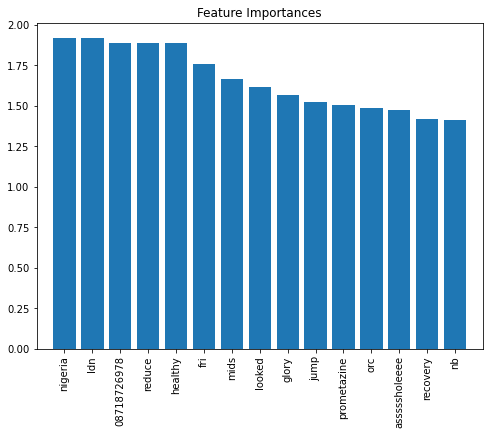

In [140]:
#set number of variables to visualize
topK=15

#Sort:descending order
index=np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.bar(range(topK),
       importances[index][:topK],
       align='center')
plt.xticks(range(topK),xcolumns[index][:topK],rotation=90)
plt.xlim([-1,topK])

In [141]:
print(xcolumns)

Index(['crazy', 'la', 'available', 'jurong', 'great', 'amore', 'wat', 'point',
       'bugis', 'cine',
       ...
       'unit', 'accent', 'lowes', 'heap', 'dump', 'salesman', '087187272008',
       'now1', 'pity', 'bitching'],
      dtype='object', length=8243)


(-1.0, 15.0)

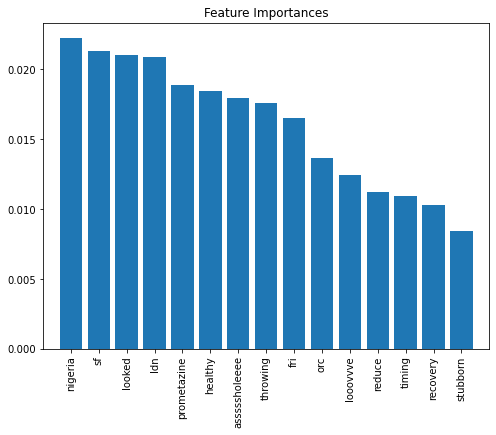

In [144]:
#set number of variables to visualize
topK=15

#Sort:descending order
importances=RF.feature_importances_ #변수별 중요도
index=np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.bar(range(topK),
       importances[index][:topK],
       align='center')
plt.xticks(range(topK),xcolumns[index][:topK],rotation=90)
plt.xlim([-1,topK])

# (8) Dimension Reduction 

In [145]:
from sklearn.decomposition import TruncatedSVD

In [146]:
SVD=TruncatedSVD(n_components=100,n_iter=100) #n_components는 몇차원으로 줄일것인지(100개로줄임)

In [147]:
train_x.shape

(3618, 8243)

In [149]:
SVD.fit(train_x)

TruncatedSVD(n_components=100, n_iter=100)

In [150]:
svd_train_x=SVD.transform(train_x)
svd_test_x=SVD.transform(test_x)

In [151]:
SVD_RF=RandomForestClassifier(n_estimators=100,random_state=100)
SVD_GB=GradientBoostingClassifier(n_estimators=100, random_state=100)
SVD_LR=LogisticRegression(max_iter=200,random_state=100, solver='saga')

In [152]:
SVD_RF.fit(svd_train_x, train_y)
SVD_GB.fit(svd_train_x,train_y)
SVD_LR.fit(svd_train_x,train_y)

LogisticRegression(max_iter=200, random_state=100, solver='saga')

In [154]:
SVD_RF_test_pred=SVD_RF.predict(svd_test_x)
SVD_GB_test_pred=SVD_GB.predict(svd_test_x)
SVD_LR_test_pred=SVD_LR.predict(svd_test_x)

In [155]:
print('RF_accuracy {:.3f}'.format(accuracy_score(test_y,RF_test_pred)))
print('RF_recall {:.3f}'.format(recall_score(test_y,RF_test_pred)))
print('RF_balanced {:.3f}'.format(balanced_accuracy_score(test_y,RF_test_pred)))
print('##############################################################')

print('GB_accuracy {:.3f}'.format(accuracy_score(test_y,GB_test_pred)))
print('GB_recall {:.3f}'.format(recall_score(test_y,GB_test_pred)))
print('GB_balanced {:.3f}'.format(balanced_accuracy_score(test_y,GB_test_pred)))
print('##############################################################')

print('LR_accuracy {:.3f}'.format(accuracy_score(test_y,LR_test_pred)))
print('LR_recall {:.3f}'.format(recall_score(test_y,LR_test_pred)))
print('LR_balanced {:.3f}'.format(balanced_accuracy_score(test_y,LR_test_pred)))
print('##############################################################')


print(' ')
print(' ')

print('SVD_RF_accuracy {:.3f}'.format(accuracy_score(test_y,SVD_RF_test_pred)))
print('SVD_RF_recall {:.3f}'.format(recall_score(test_y,SVD_RF_test_pred)))
print('SVD_RF_balanced {:.3f}'.format(balanced_accuracy_score(test_y,SVD_RF_test_pred)))
print('##############################################################')

print('SVD_GB_accuracy {:.3f}'.format(accuracy_score(test_y,SVD_GB_test_pred)))
print('SVD_GB_recall {:.3f}'.format(recall_score(test_y,SVD_GB_test_pred)))
print('SVD_GB_balanced {:.3f}'.format(balanced_accuracy_score(test_y,SVD_GB_test_pred)))
print('##############################################################')

print('SVD_LR_accuracy {:.3f}'.format(accuracy_score(test_y,SVD_LR_test_pred)))
print('SVD_LR_recall {:.3f}'.format(recall_score(test_y,SVD_LR_test_pred)))
print('SVD_LR_balanced {:.3f}'.format(balanced_accuracy_score(test_y,SVD_LR_test_pred)))


RF_accuracy 0.978
RF_recall 0.827
RF_balanced 0.913
##############################################################
GB_accuracy 0.965
GB_recall 0.750
GB_balanced 0.873
##############################################################
LR_accuracy 0.983
LR_recall 0.867
LR_balanced 0.933
##############################################################
 
 
SVD_RF_accuracy 0.974
SVD_RF_recall 0.811
SVD_RF_balanced 0.905
##############################################################
SVD_GB_accuracy 0.979
SVD_GB_recall 0.872
SVD_GB_balanced 0.934
##############################################################
SVD_LR_accuracy 0.980
SVD_LR_recall 0.872
SVD_LR_balanced 0.934
